In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv(r"C:\Users\gobus\Desktop\,\ML-AI-Blog\Machine Learning Full\Machine Learning Tutorial Part 1 _ 2\Part 2\cars (dataset for k means).csv")

In [24]:
x = data[data.columns[:-1]]
x = x._convert(numeric=True)
print(x)

      mpg   cylinders   cubicinches   hp   weightlbs   time-to-60   year
0    14.0           8         350.0  165      4209.0           12   1972
1    31.9           4          89.0   71      1925.0           14   1980
2    17.0           8         302.0  140      3449.0           11   1971
3    15.0           8         400.0  150      3761.0           10   1971
4    30.5           4          98.0   63      2051.0           17   1978
..    ...         ...           ...  ...         ...          ...    ...
256  17.0           8         305.0  130      3840.0           15   1980
257  36.1           4          91.0   60      1800.0           16   1979
258  22.0           6         232.0  112      2835.0           15   1983
259  18.0           6         232.0  100      3288.0           16   1972
260  22.0           6         250.0  105      3353.0           15   1977

[261 rows x 7 columns]


In [26]:
for i in x.columns:
    x[i]=x[i].fillna(int(x[i].mean()))
for i in x.columns:
    print(x[i].isnull().sum())

0
0
0
0
0
0
0


C:\Users\gobus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


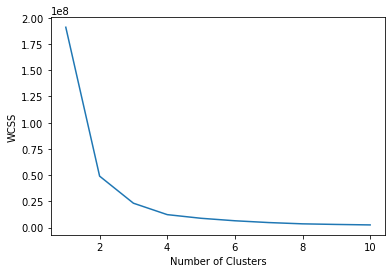

In [29]:
#Finding the optimal number of clusters using elbow method
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=300, n_init=10, random_state=0, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [41]:
#Applying the model
kmeans = KMeans(n_clusters = 3, max_iter=300, n_init=10, random_state=0, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

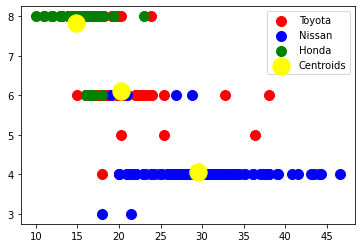

In [49]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1],s=100,c="red",label="Toyota")
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1],s=100,c="blue",label="Nissan")
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1],s=100,c="green",label="Honda")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300, color="yellow", label="Centroids")
plt.legend()